In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('titanic.csv')

In [17]:

# Step 1: Data Preprocessing
# Handle missing values
df.dropna(subset=['Age', 'Embarked'], inplace=True)  # Drop rows with missing Age or Embarked values
df['Cabin'] = df['Cabin'].notna().astype(int)  # Convert Cabin to binary variable indicating presence/absence

In [18]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [19]:
# Split the data into features and target
X = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'])
y = df['Survived']

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Step 2: Model Training
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
best_C = 10 ** (cv_scores.mean())

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
# Step 3: Model Evaluation
# Predict on the testing data
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7902097902097902
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        80
           1       0.85      0.63      0.73        63

    accuracy                           0.79       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.80      0.79      0.78       143

Confusion Matrix:
[[73  7]
 [23 40]]


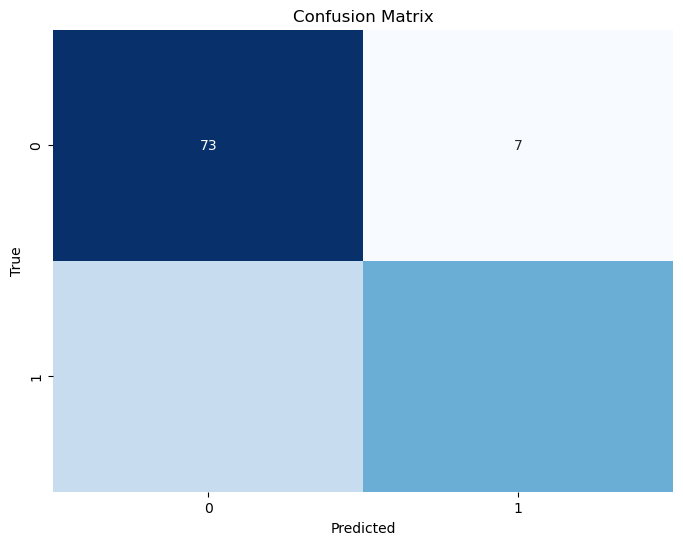

In [10]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Step 4: Interpretation
# Retrieve the coefficients of the logistic regression model
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
print(coefficients)

       feature  coefficient
0       Pclass    -1.117450
1          Age    -0.037701
2        SibSp    -0.338815
3        Parch    -0.015252
4         Fare    -0.001317
5        Cabin     0.575873
6   Sex_female     1.324735
7     Sex_male    -1.335160
8   Embarked_C     0.235195
9   Embarked_Q    -0.258073
10  Embarked_S     0.012453


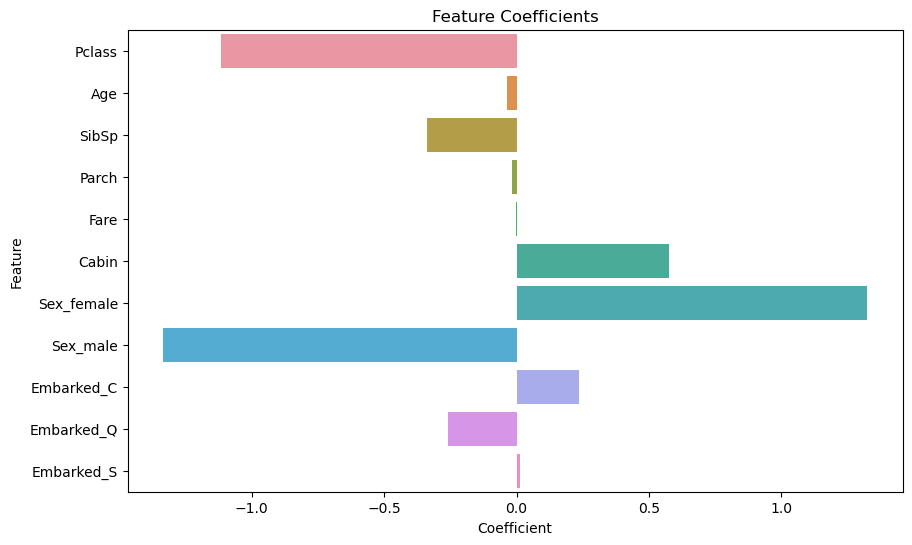

In [12]:
# Visualize Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()